# Kateryna Nosulko - Shopify Fall 2022 Data Science Intern Challenge 

### Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation.  
a. Think about a better way to evaluate this data.  
  
*Short answer: there are outliers present in the dataset that affect the average and the standard deviation is high, hence it’s not the best metric in this case. Removing outliers is not a good idea in my opinion, since the average is affected by a number of recurring large orders. I suggest using a different metric altogether. (Please read on for a detailed analysis.)*  
  
b. What metric would you report for this dataset? 
  
*I think using median would be best in this case, which would show us the middle score of a distribution.*
  
c. What is its value?
  
*The median value is $284.*

In [1]:
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime

In [3]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
#loading the file
df = pd.read_csv('Copy of 2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [5]:
#inspecting the data
df.shape

(5000, 7)

In [6]:
df.dtypes.value_counts()

int64     5
object    2
dtype: int64

In [7]:
#taking a look at the data
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [8]:
#checking if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [9]:
#looking at statistical data
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### a. Think about a better way to evaluate this data.
Looking at *order_amount* and *total_items* we can notice that there are some extreme outliers present in the dataset, with large standard deviation, hence the average is not a good indicator in this case. **I think there are two potential solutions - either taking a median order value instead of the average or getting rid of outliers, which in this case is not a good idea as looks like those data points are legitimate (and not human error for example), so shouldn't be just ignored.** Let's take a closer look at them.

<AxesSubplot:>

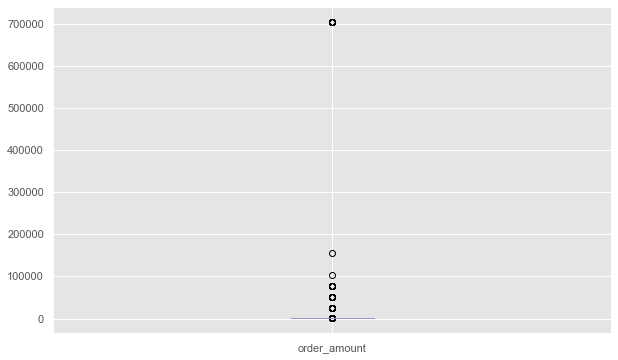

In [10]:
df.boxplot(column=['order_amount'])

<AxesSubplot:>

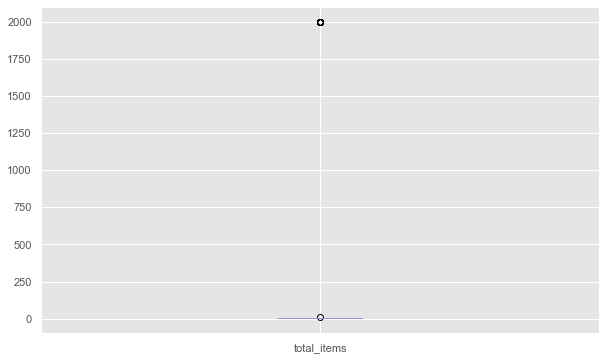

In [11]:
df.boxplot(column=['total_items'])

<AxesSubplot:xlabel='order_amount', ylabel='Density'>

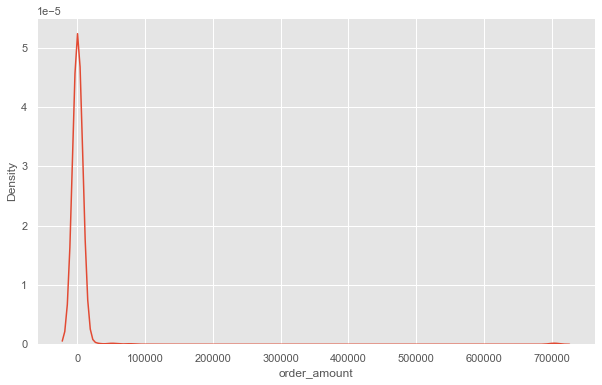

In [12]:
sns.kdeplot(df['order_amount'])

In [13]:
#looking at the spread of the middle half of the data
first_q = df['order_amount'].quantile(0.25)
third_q = df['order_amount'].quantile(0.75)
IQR = third_q - first_q
IQR

227.0

In [14]:
df2=df.loc[(df['order_amount'] > 200000)]
df2

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


### b. What metric would you report for this dataset?
After inspecting the data closer, I stand by my point in the part a. of this question - I think **using the median** instead of average would be the best solution in this case. 
I also found the culprit - looks like someone with the same user id is *suspiciously* placing a reccuring order for the same amount/number of items.

In [41]:
#calculating the mean
df['order_amount'].median()

284.0

### c. What is its value?
**The median order value is $284.**

### Thanks for reading :)

### Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

#### a. How many orders were shipped by Speedy Express in total?  

In [ ]:
SELECT COUNT(*) as NumberOfOrders  
FROM Orders as O  
INNER JOIN Shippers as S ON O.ShipperID = S.ShipperID  
WHERE S.ShipperName = 'Speedy Express';

Answer:   
**Number of Records: 1**  
**NumberOfOrders      54**   

#### b. What is the last name of the employee with the most orders?  

In [ ]:
SELECT TOP 1 E.LastName as Employee, COUNT(*) as NumberOfOrders  
FROM Orders as O  
INNER JOIN Employees as E ON E.EmployeeID = O.EmployeeID  
GROUP BY E.LastName  
ORDER BY COUNT(*) DESC; 

Answer:  
**Number of Records: 1  
Employee: Peacock  
NumberOfOrders: 40**   

#### c. What product was ordered the most by customers in Germany?  

In [ ]:
SELECT TOP 1 P.ProductName as Product, COUNT(*) as NumberOfOrders  
FROM (((OrderDetails as OD  
INNER JOIN Products as P ON P.ProductID = OD.ProductID)  
INNER JOIN Orders as O ON O.OrderID = OD.OrderID)  
INNER JOIN Customers as C ON O.CustomerID = C.CustomerID)  
WHERE C.Country = 'Germany'  
GROUP BY P.ProductName  
ORDER BY COUNT(*) DESC;  

Answer:  
**Number of Records: 1   
Product: Gorgonzola Telino  
NumberOfOrders: 5**   